# _Python for Scientific Data Analysis_

## Homework #8 - Week 12 [INCOMPLETE] 
(_the full assignment will be due November 15_)


### 1. Project Update

* Please give me a **short** update on the progress of your class project.  In particular, I would like to see ...

- A description of the current status of your project
- Items where you are getting stuck (if any)/questions you may have
- Any plots or graphics you have produced beyond those from the previous homework.



### 2. Axis Formatting

 Start with the data arrays shown near the beginning of the part2a lecture notes along with their polynomial fits (second example plot):
 
 
 **NOW ...**
 
 **Adjust this plot** using information from the Axis Limits, Scaling, and Formatting section and elsewhere to produce the following modified plot:
 
 ![](./ex2_2revised2.png)
 
 
 
 Note the following things:
 
 * the axis labeling formats
 * tick formatting
 * scalings (linear or logarithmic)
 * spine thickness
 * transparency of the plotted points
 * linestyles
 * symbol sizes
 
 (also note that the exact points and functional fits will differ from mine since they are produced from random number generators)
 
 one note: with this revised plots, the y axis label on the second plot may run off the screen unless you resize the figure.  Doing the following allowed the label to appear for me:
 
 ```
 from matplotlib import rcParams
 rcParams['figure.figsize']=[12,8]
 ```

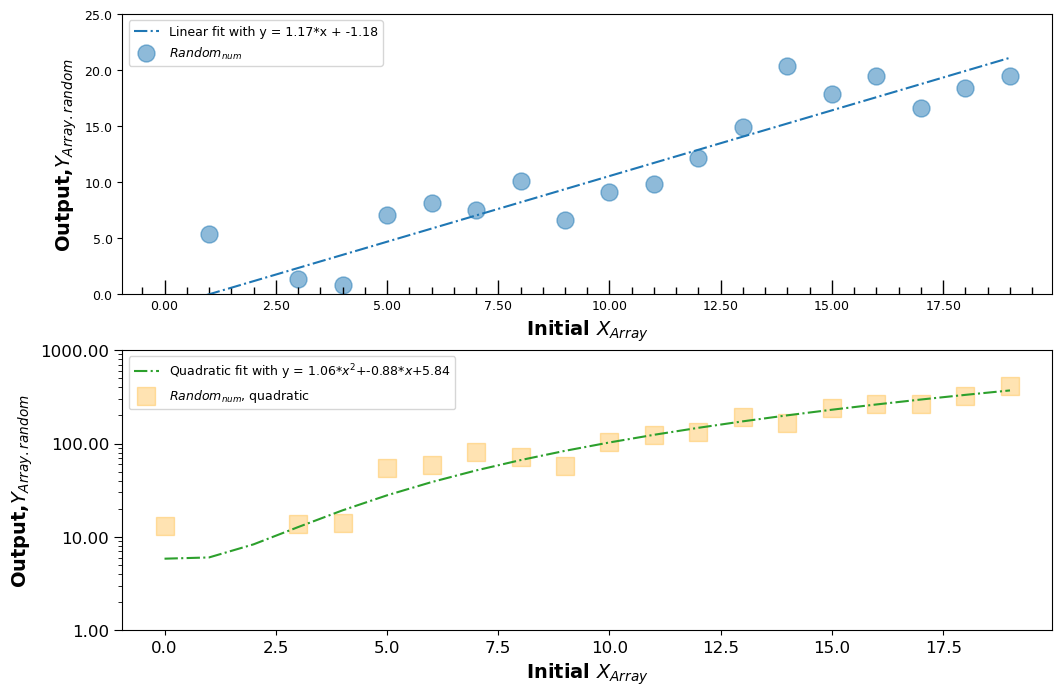

In [11]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator,AutoMinorLocator

rcParams['figure.figsize']=[12,8]
xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20)
#y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
#a polynomial fit of degree one 

#yarray2 again varied +/- about x but with different amount of 20*random_number
yarray2=(np.arange(20))**2.+20*np.random.randn(20)

#polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
#a convenience class to write the polynomial fit

#two rows, 1 column: i.e. the plots are vertically stacked
fig,axes=plt.subplots(2,1) 

#first subplot
axes[0].plot(xarray,xarray*a+b,linestyle='-.',label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b))
axes[0].scatter(xarray,yarray,marker='o',s=150,alpha=0.5,label=r'$Random_{num}$')
axes[0].legend(loc='best',fontsize=9)
axes[0].set_ylim(0.0,25.0)
axes[0].set_ylabel(r'Output,$Y_{Array.random}$', size=14, weight='bold')
axes[0].set_xlabel(r'Initial $X_{Array}$', size=14, weight='bold')
axes[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
axes[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(5))
axes[0].tick_params(axis='both', which='both', labelsize=9)
axes[0].tick_params(axis='x',which='both',width=1,length=10,direction='in')
axes[0].tick_params(axis='x',which='minor', length=5)
#second subplot
axes[1].plot(xarray,poly(xarray),linestyle='-.',c='tab:green',
 label=r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2))

axes[1].scatter(xarray,yarray2,label=r'$Random_{num}$, quadratic',marker='s',c='orange',s=150, alpha=0.3)
axes[1].set_ylim(1.0, 1e3)
axes[1].set_yscale('log')
axes[1].set_ylabel(r'Output,$Y_{Array.random}$', size=14, weight='bold')
axes[1].set_xlabel(r'Initial $X_{Array}$', size=14, weight='bold')
axes[1].legend(loc='best',fontsize=9)
axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
axes[1].tick_params(which='both', axis='both', labelsize=12)
axes[1].tick_params(axis='y', which='major', length=6)
axes[1].tick_params(axis='y', which='minor', length=3)

### 3. Secondary/Twin Axes

Most stellar spectra are plotted with x units of wavelength (because the numbers go from smaller to larger, left to right).   

Read in the following stellar atmosphere model 'lte9800-3.5-NextGen.fits.gz'.  The native units are wavelength (in microns) and flux density in $ergs/s/cm^{2}/A$.

Plot the x axis in both wavelength and frequency units as follows:

 ![](./stellarspectrum.png)
 
 

 
The following piece of code will get you started (note, you will need to install AstroPy for this to work (AstroPy will be discussed in mid November)

```
from astropy.io import fits


primary_model=fits.open('./lte9800-3.5.NextGen.fits.gz')
                    
phead=primary_model[0].header
primary_spec=primary_model[0].data

primary_spec.shape
##primary_wvlh=primary_spec[:,0]
#prim

primary_wvlh=primary_spec[0,:]
primary_flux=primary_spec[1,:]
```


Text(0, 0.5, 'Flux Density $(ergs/s/cm^2/A)$')

/tmp/ipykernel_56778/2903850497.py:27: RuntimeWarning: divide by zero encountered in divide
  lam=c/x


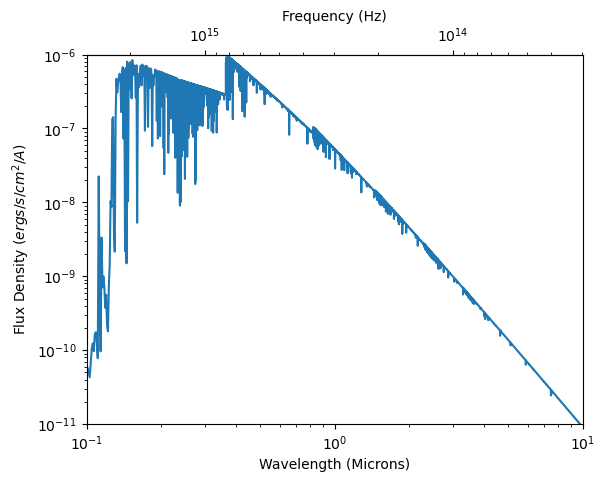

In [26]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator,AutoMinorLocator

primary_model=fits.open('./lte9800-3.5.NextGen.fits.gz')
                    
phead=primary_model[0].header
primary_spec=primary_model[0].data

##primary_wvlh=primary_spec[:,0]
#prim

primary_wvlh=primary_spec[0,:]         #x1
primary_flux=primary_spec[1,:]         #y
# primary_freq=2*np.pi/primary_wvlh      #x2

def lam_2_frq(x):
    #assuming x is in microns
    c=299792458*1e6    #speed of light in um / s
    frq = c/x
    return frq

def frq_2_lam(x):
    c=299792458*1e6
    lam=c/x
    return lam




primary_spec.shape
plt.rcdefaults()
fig, ax = plt.subplots()
sec_ax = ax.secondary_xaxis('top', functions=(lam_2_frq,frq_2_lam))
sec_ax.set_xlabel('Frequency (Hz)')
ax.loglog(primary_wvlh,primary_flux)

ax.set_ylim(1e-11,1e-6)
ax.set_xlim(1e-1,1e1)
# sec_ax.loglog(primary_freq,primary_flux)
ax.set_xlabel('Wavelength (Microns)')
ax.set_ylabel(r'Flux Density $(ergs/s/cm^2/A)$')






### 4. Twin Axes

From pirates now to something slightly more serious ...

Start with the Co2 concentration and year arrays in the lecture notes to Matplotlib Part2c.  I.e.

```
#generating data for main axis
CO2concentration=np.array([289,288,291,295,294,298,297,299,310,317,325,338,354,370,390.1,401,420]) #roughly estimated from NOAA
CO2years=np.array([1700,1750,1800,1850,1875,1900,1925,1950,1960,1970,1980,1990,2000,2005,2010,2015,2020])
```

And now read in global mean temperature anomaly data from [https://climate.copernicus.eu/climate-indicators/temperature]()

You can read in the data as follows:

```
a=np.loadtxt('climate_data.txt')
```
The year is the first column; the Berkeley, Hadley Centre, and NOAA measurements are columns 2, 3, and 4.

Use twin axes to reproduce this plot

![](./tempvco2.png)

Here, the green line is the mean temperature anomaly from three separate measurements, blue is the standard deviation of these measurements.
 


### 5. Shadings/Fill-Between Plots

* read in files for spectra for HIP 99770 b and HD 33632 Ab.  The columns are: Wavelength (microns), Flux Density (mJy), uncertainty in Flux Density (mJy), Signal-to-noise Ratio

* scale the HD 33632 Ab spectrum so that the mean value of its spectrum and HIP 99770 b's spectrum are the same (using np.mean).

You will produce two side-by-side panels:

Panel 1

* Use the plt.plot to produce a line plot _with_ symbols corresponding to individual data points
* Use the fill-between function to shade in regions +/- the uncertainties
* Add a legend and adjust the axes formatting to thicken the spines, add labels, and add 5 minor tick marks in between major ticks

Panel 2

* Same as panel 1 except you are doing simple error bar plots, not fill-between.

The resulting figure should look as follows:

![](./prob5_rev.png)

 
